Neste notebook vamos testar uma técnica de missing data, trocando 50% dos valores de uma banda pela média das bandas vizinhas ou pela banda vizinha (nas pontas do espectro)

In [18]:
#chamamando os pacotes que vou usar e criando uma função que abre o fits
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [19]:
data_file = os.path.join('proj1.fits')
data, _ = open_fits_catalog(data_file)

In [20]:
BANDS = ["R","Z", "G", "W1", "W2"]
mags = ['MAG_'+band for band in BANDS]
#bandas que vamos usar

In [21]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

# queremos 10% de teste
test_percentual = 1/10
#vou selecionar os 10%
test_cut = np.random.uniform(0, 1, len(data)) < test_percentual
#salvar os 10% na variável test_data
test_data = data[test_cut]

#vamos já criar as variáveis para colocar missing data
test_data1 = data[test_cut]
test_data2 = data[test_cut]
test_data3 = data[test_cut]
test_data4 = data[test_cut]
test_data5 = data[test_cut]

#selecionar os outros 90%
train_val_data = data[~test_cut]

#calcular os 5 grupos cada um com 18%, A, B, C, D e E
#para A
A_percentual = 1/5
A_cut = np.random.uniform(0, 1, len(train_val_data)) < A_percentual
A_data = train_val_data[A_cut]

#72%
train_val_data2 = train_val_data[~A_cut]

#para B
B_percentual = 1/4
B_cut = np.random.uniform(0, 1, len(train_val_data2)) < B_percentual
B_data = train_val_data2[B_cut]

#54%
train_val_data3 = train_val_data2[~B_cut]

#para C
C_percentual = 1/3
C_cut = np.random.uniform(0, 1, len(train_val_data3)) < C_percentual
C_data = train_val_data3[C_cut]

#36%
train_val_data4 = train_val_data3[~C_cut]

#para D
D_percentual = 1/2
D_cut = np.random.uniform(0, 1, len(train_val_data4)) < D_percentual
D_data = train_val_data4[D_cut] 

#18%
#para E
E_data = train_val_data4[~D_cut] 


df1 = A_data.to_pandas()
#print(df1)

df2 = B_data.to_pandas()
#print(df2)

df3 = C_data.to_pandas()
#print(df3)

df4 = D_data.to_pandas()
#print(df4)

df5 = E_data.to_pandas()
#print(df5)


#Agora é necessário juntar as coisas em 5 novos grupos:

train_datadf1 = df2.append([df3, df4, df5], ignore_index=True)
#print(train_datadf1)

train_datadf2 = df1.append([df3, df4, df5], ignore_index=True)
#print(train_datadf2)

train_datadf3 = df1.append([df2, df4, df5], ignore_index=True)
#print(train_datadf3)

train_datadf4 = df1.append([df2, df3, df5], ignore_index=True)
#print(train_datadf4)

train_datadf5 = df1.append([df2, df3, df4], ignore_index=True)
#print(train_datadf5)


#grupo 1: A é val_data1, B, C, D e E são train_data1
val_data1 = A_data
train_data1 = Table.from_pandas(train_datadf1)

#grupo 2: B é val_data2, A, C, D e E são train_data2
val_data2 = B_data
train_data2 = Table.from_pandas(train_datadf2)

#grupo 3: C é val_data3, A, B, D e E são train_data3
val_data3 = C_data
train_data3 = Table.from_pandas(train_datadf3)

#grupo 4: D é val_data4, A, B, C e E são train_data4
val_data4 = D_data
train_data4 = Table.from_pandas(train_datadf4)

#grupo 5: D é val_data5, A, B, C e D são train_data5
val_data5 = E_data
train_data5 = Table.from_pandas(train_datadf5)


print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data1)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data2)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data3)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data4)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data5)/len(data)*100:.2f}%')

print(f'Train Percent1 = {len(train_data1)/len(data)*100:.2f}%')
print(f'Val Percent1 = {len(val_data1)/len(data)*100:.2f}%')

print(f'Train Percent2 = {len(train_data2)/len(data)*100:.2f}%')
print(f'Val Percent2 = {len(val_data2)/len(data)*100:.2f}%')

print(f'Train Percent3 = {len(train_data3)/len(data)*100:.2f}%')
print(f'Val Percent3 = {len(val_data3)/len(data)*100:.2f}%')

print(f'Train Percent4 = {len(train_data4)/len(data)*100:.2f}%')
print(f'Val Percent4 = {len(val_data4)/len(data)*100:.2f}%')

print(f'Train Percent5 = {len(train_data5)/len(data)*100:.2f}%')
print(f'Val Percent5 = {len(val_data5)/len(data)*100:.2f}%')


Test Percent = 9.99%
Test Percent = 9.99%
Test Percent = 9.99%
Test Percent = 9.99%
Test Percent = 9.99%
Test Percent = 9.99%
Train Percent1 = 71.98%
Val Percent1 = 18.03%
Train Percent2 = 72.01%
Val Percent2 = 18.00%
Train Percent3 = 72.02%
Val Percent3 = 17.99%
Train Percent4 = 72.03%
Val Percent4 = 17.98%
Train Percent5 = 71.99%
Val Percent5 = 18.01%


In [24]:
# Antes de embaralhar os dados vamos substituir os dados de teste
# com missing data 
# ordem no espectro G R Z W1 W2
# substituindo metade dos dados da banda G por dados da banda R 


cut_out = np.random.uniform(0,1,len(test_data)) < 0.5
test_data1['MAG_G'][cut_out] = test_data1['MAG_R'][cut_out]


# substituindo metade dos dados da banda  pela média

test_data2['MAG_R'][cut_out] = ((test_data2['MAG_G']+test_data2['MAG_Z'])/2)[cut_out]


test_data3['MAG_Z'][cut_out] = ((test_data3['MAG_R']+test_data3['MAG_W1'])/2)[cut_out]


test_data4['MAG_W1'][cut_out] = ((test_data4['MAG_Z']+test_data4['MAG_W2'])/2)[cut_out]

# substituindo metade dos dados da banda W2 por dados da banda W1 

#test_data5


test_data5['MAG_W2'][cut_out] = test_data5['MAG_W1'][cut_out]


In [6]:
#embaralhando os dados

#embaralhando o teste
test_shuffler = np.random.choice(len(test_data), len(test_data), replace=False)
test_data = test_data[test_shuffler]

test_data1 = test_data1[test_shuffler]


test_data2 = test_data2[test_shuffler]


test_data3 = test_data3[test_shuffler]


test_data4 = test_data4[test_shuffler]


test_data5 = test_data5[test_shuffler]

#embaralhando grupo 1

train_shuffler1 = np.random.choice(len(train_data1), len(train_data1), replace=False)
train_data1 = train_data1[train_shuffler1]

val_shuffler1 = np.random.choice(len(val_data1), len(val_data1), replace=False)
val_data1 = val_data1[val_shuffler1]

#embaralhando grupo 2

train_shuffler2 = np.random.choice(len(train_data2), len(train_data2), replace=False)
train_data2 = train_data2[train_shuffler2]

val_shuffler2 = np.random.choice(len(val_data2), len(val_data2), replace=False)
val_data2 = val_data2[val_shuffler2]

#embaralhando grupo 3

train_shuffler3 = np.random.choice(len(train_data3), len(train_data3), replace=False)
train_data3 = train_data3[train_shuffler3]

val_shuffler3 = np.random.choice(len(val_data3), len(val_data3), replace=False)
val_data3 = val_data3[val_shuffler3]

#embaralhando grupo 4

train_shuffler4 = np.random.choice(len(train_data4), len(train_data4), replace=False)
train_data4 = train_data4[train_shuffler4]

val_shuffler4 = np.random.choice(len(val_data4), len(val_data4), replace=False)
val_data4 = val_data4[val_shuffler4]

#embaralhando grupo 5

train_shuffler5 = np.random.choice(len(train_data5), len(train_data5), replace=False)
train_data5 = train_data5[train_shuffler1]

val_shuffler5 = np.random.choice(len(val_data5), len(val_data5), replace=False)
val_data5 = val_data5[val_shuffler5]


#especificando os dados que usaremos para testar (mags, x_train) e os dados resposta (zspec, y_train)
#estou criando vetores para todos os testes mas se a opção de shuffle for a mesma é possível comparar todos com o mesmo y_test

x_test = np.array([test_data.field(mag) for mag in mags]).T
y_test = np.array(test_data.field('zspec'))

x_test1 = np.array([test_data1.field(mag) for mag in mags]).T
y_test1 = np.array(test_data1.field('zspec'))

x_test2 = np.array([test_data2.field(mag) for mag in mags]).T
y_test2 = np.array(test_data2.field('zspec'))

x_test3 = np.array([test_data3.field(mag) for mag in mags]).T
y_test3 = np.array(test_data3.field('zspec'))

x_test4 = np.array([test_data4.field(mag) for mag in mags]).T
y_test4 = np.array(test_data4.field('zspec'))

x_test5 = np.array([test_data5.field(mag) for mag in mags]).T
y_test5 = np.array(test_data5.field('zspec'))

#especificando os dados que usaremos para treinar (mags, x_train) e os dados resposta (zspec, y_train)

x_train1 = np.array([train_data1.field(mag) for mag in mags]).T
y_train1 = np.array(train_data1.field('zspec'))

x_train2 = np.array([train_data2.field(mag) for mag in mags]).T
y_train2 = np.array(train_data2.field('zspec'))

x_train3 = np.array([train_data3.field(mag) for mag in mags]).T
y_train3 = np.array(train_data3.field('zspec'))

x_train4 = np.array([train_data4.field(mag) for mag in mags]).T
y_train4 = np.array(train_data4.field('zspec'))

x_train5 = np.array([train_data5.field(mag) for mag in mags]).T
y_train5 = np.array(train_data5.field('zspec'))

#especificando os dados que usaremos para validação (mags, x_train) e os dados resposta (zspec, y_train)

x_val1 = np.array([val_data1.field(mag) for mag in mags]).T
y_val1 = np.array(val_data1.field('zspec'))

x_val2 = np.array([val_data2.field(mag) for mag in mags]).T
y_val2 = np.array(val_data2.field('zspec'))

x_val3 = np.array([val_data3.field(mag) for mag in mags]).T
y_val3 = np.array(val_data3.field('zspec'))

x_val4 = np.array([val_data4.field(mag) for mag in mags]).T
y_val4 = np.array(val_data4.field('zspec'))

x_val5 = np.array([val_data5.field(mag) for mag in mags]).T
y_val5 = np.array(val_data5.field('zspec'))


scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_val1 = scaler.transform(x_val1)
x_train2 = scaler.transform(x_train2)
x_val2 = scaler.transform(x_val2)
x_train3 = scaler.transform(x_train3)
x_val3 = scaler.transform(x_val3)
x_train4 = scaler.transform(x_train4)
x_val4 = scaler.transform(x_val4)
x_train5 = scaler.transform(x_train5)
x_val5 = scaler.transform(x_val5)
x_test = scaler.transform(x_test)
x_test1 = scaler.transform(x_test1)
x_test2 = scaler.transform(x_test2)
x_test3 = scaler.transform(x_test3)
x_test4 = scaler.transform(x_test4)
x_test5 = scaler.transform(x_test5)

# np.max(x_test[:, 1])

In [7]:
#se usar fora do colab tem que instalar o tensorflow
#pip install tensorflow
import tensorflow as tf
import tensorflow.keras as keras


Agora vamos usar o modelo treinado com todas as bandas com menor loss na validação para estimar os novos testes

In [8]:
#vamos chamar o modelo salvo do outro notebook
regressor24 = tf.keras.models.load_model('regressor24')


preds = regressor24.predict(x_test)
preds1 = regressor24.predict(x_test1)
preds2 = regressor24.predict(x_test2)
preds3 = regressor24.predict(x_test3)
preds4 = regressor24.predict(x_test4)
preds5 = regressor24.predict(x_test5)

In [9]:
### CALCULO DAS MÉTRICAS E PLOTS
def get_zstatistic(z,zspec):
    

    deltaz=np.array(len(z))
    deltaz=[z[i]-zspec[i] for i in range(len(z))]
    mean_bias=np.mean(deltaz)

    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    median_bias=np.percentile(deltaz,50)
    return mean_bias,median_bias,sigma68
    

def redshift_plot(z, zspec):
    
    plt.style.use('default')
    
    fig = plt.figure(figsize=(10, 8))
    
    mean_bias,median_bias,sigma68=get_zstatistic(z, zspec)


    text="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    ax = fig.add_subplot()
    
    #dispersão entre photo-z e spec-z
    ax.scatter(np.array(zspec), np.array(z),
                       alpha = 0.5,
                       s=8,marker='o')
    
    #reta x = y
    reta = [0, max([max(zspec), max(z)])]
    ax.plot(reta, reta,
              ls='dashed', color='black', lw=0.5)
    
    #limites e legendas
    ax.set_ylim(min(z),max(z))
    ax.set_xlim(0,max(zspec))
    ax.set_ylabel("$z_{phot}$", fontsize=15)
    ax.set_xlabel("$z_{spec}$", fontsize=15)
    ax.text(0.7*max(zspec), .2*max(z), text, va="top", fontsize=12)
    
    plt.show()


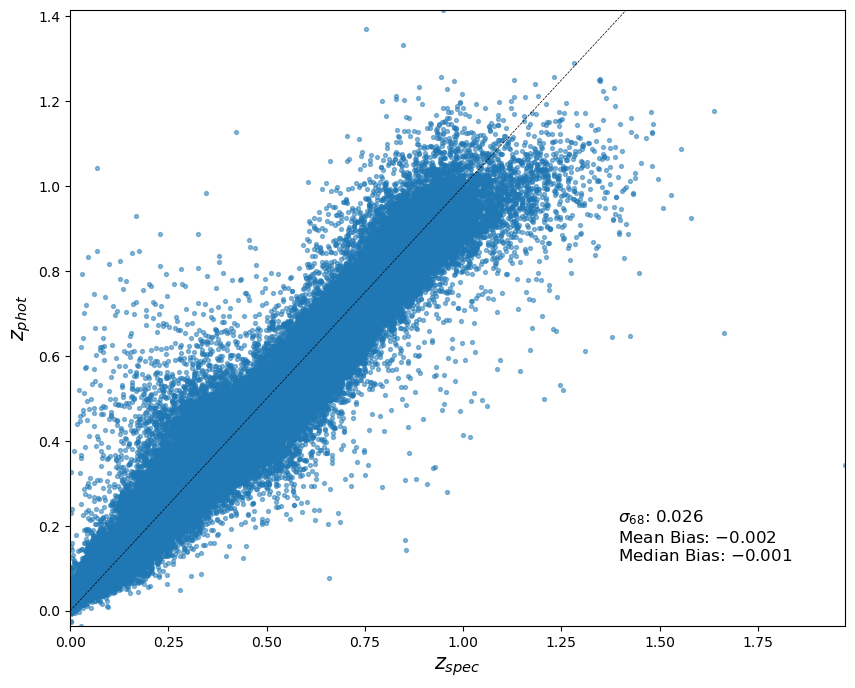

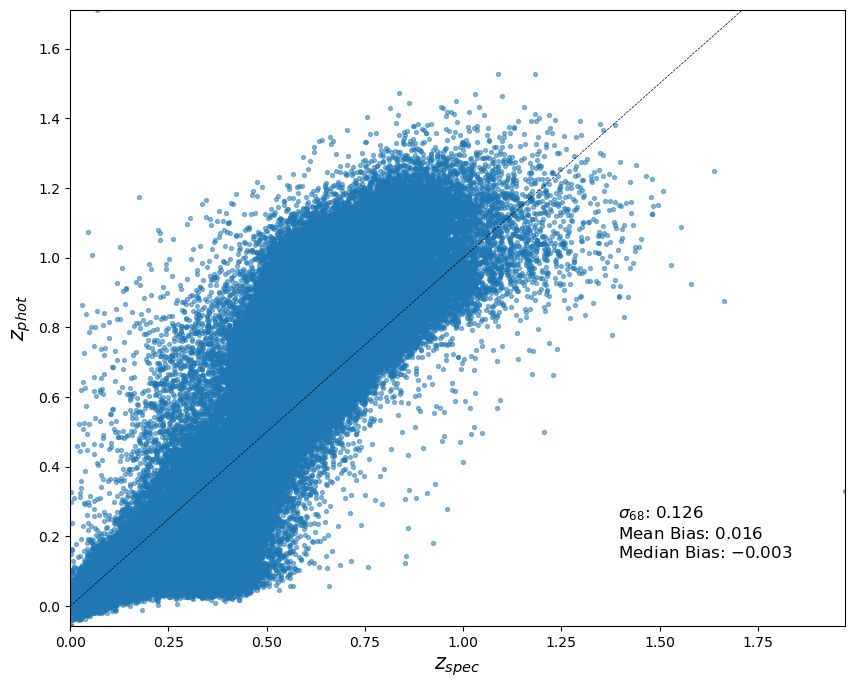

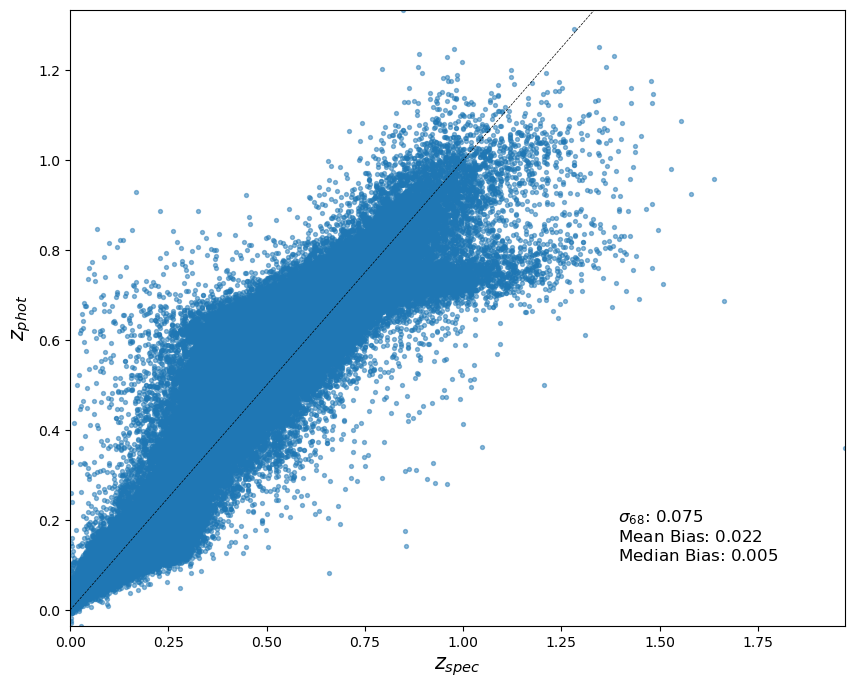

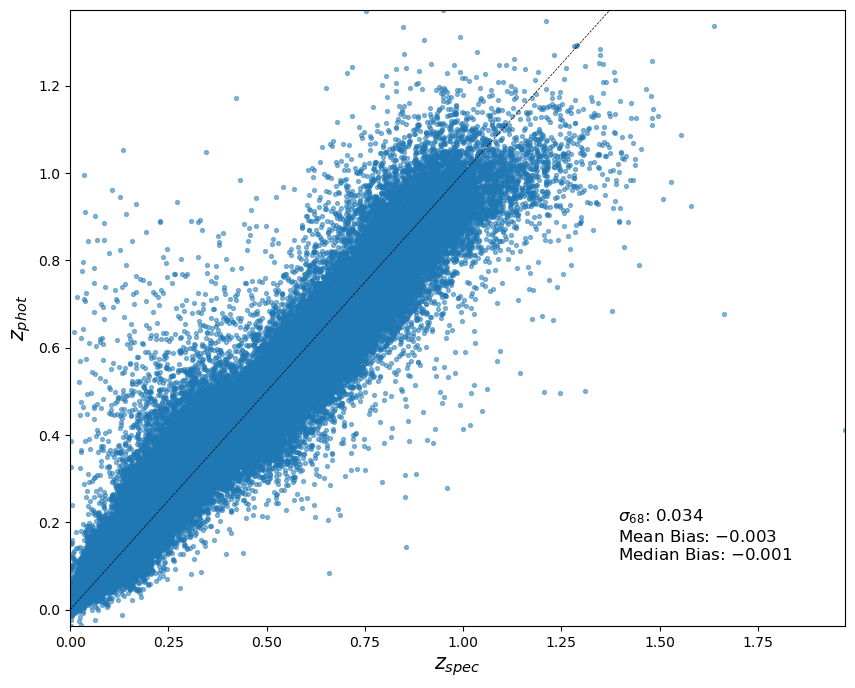

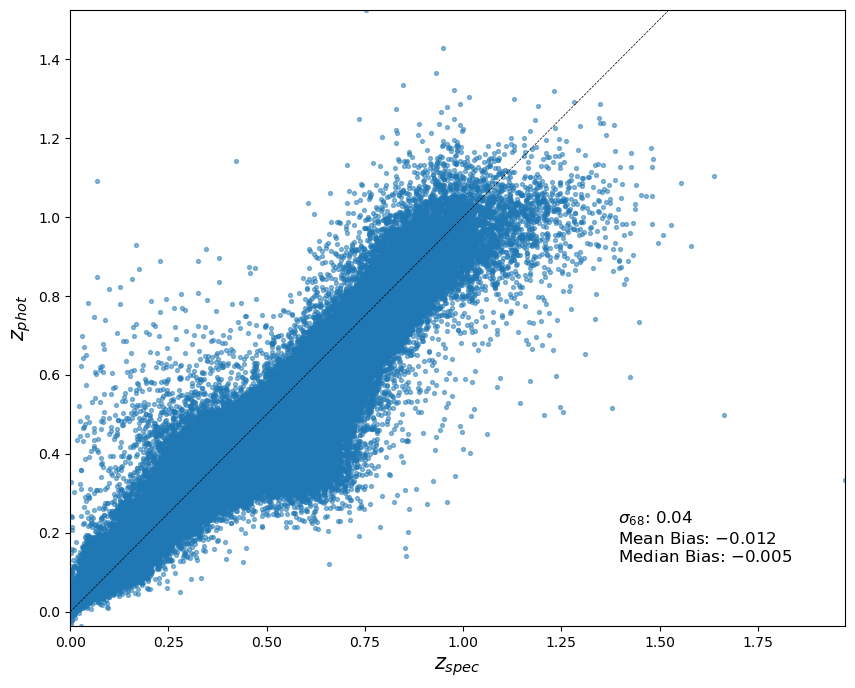

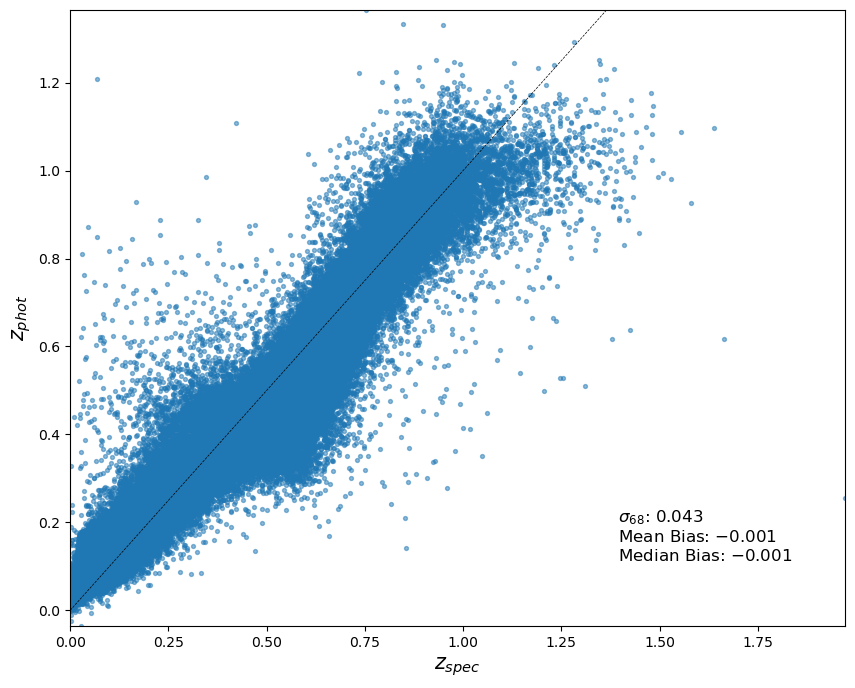

In [10]:
redshift_plot(preds, y_test)
redshift_plot(preds1, y_test)
redshift_plot(preds2, y_test)
redshift_plot(preds3, y_test)
redshift_plot(preds4, y_test)
redshift_plot(preds5, y_test)